

```
`# This is formatted as code`
```
**01.INSTALLING YOLOv8**


In [2]:
pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 62.3 MB/s eta 0:00:00


In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YOUR_API_KEY")
rf = Roboflow(api_key="HITssBgIoQ0iGZAUW0Wz")
project = rf.workspace("selfdriving-car-qtywx").project("self-driving-cars-lfjou")
version = project.version(6)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.7/91.7 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 76.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Self-Driving-Cars-6 in yolov8:: 100%|██████████| 9950/9950 [00:00<00:00, 10225.71it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
%pwd

'/content'

In [5]:
!mkdir RoadSignDetection

In [6]:
!ls

RoadSignDetection  sample_data	Self-Driving-Cars-6


In [8]:
path="/content/RoadSignDetection"
%pwd

'/content'

In [9]:
%cd

/root


In [14]:
import os
os.chdir("/content/RoadSignDetection/Self-Driving-Cars-6")

FileNotFoundError: [Errno 2] No such file or directory: '/content/RoadSignDetection/Self-Driving-Cars-6'

In [13]:
!yolo task=detect mode=train model=yolov8n.pt data=/content/Self-Driving-Cars-6/data.yaml epochs=10 imgsz=640 batch=16

Ultralytics 8.4.2 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Self-Driving-Cars-6/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, 

In [15]:
!ls '/content/RoadSignDetection/runs/detect/train2'

args.yaml			 labels.jpg		val_batch0_pred.jpg
BoxF1_curve.png			 results.csv		val_batch1_labels.jpg
BoxP_curve.png			 results.png		val_batch1_pred.jpg
BoxPR_curve.png			 train_batch0.jpg	val_batch2_labels.jpg
BoxR_curve.png			 train_batch1.jpg	val_batch2_pred.jpg
confusion_matrix_normalized.png  train_batch2.jpg	weights
confusion_matrix.png		 val_batch0_labels.jpg


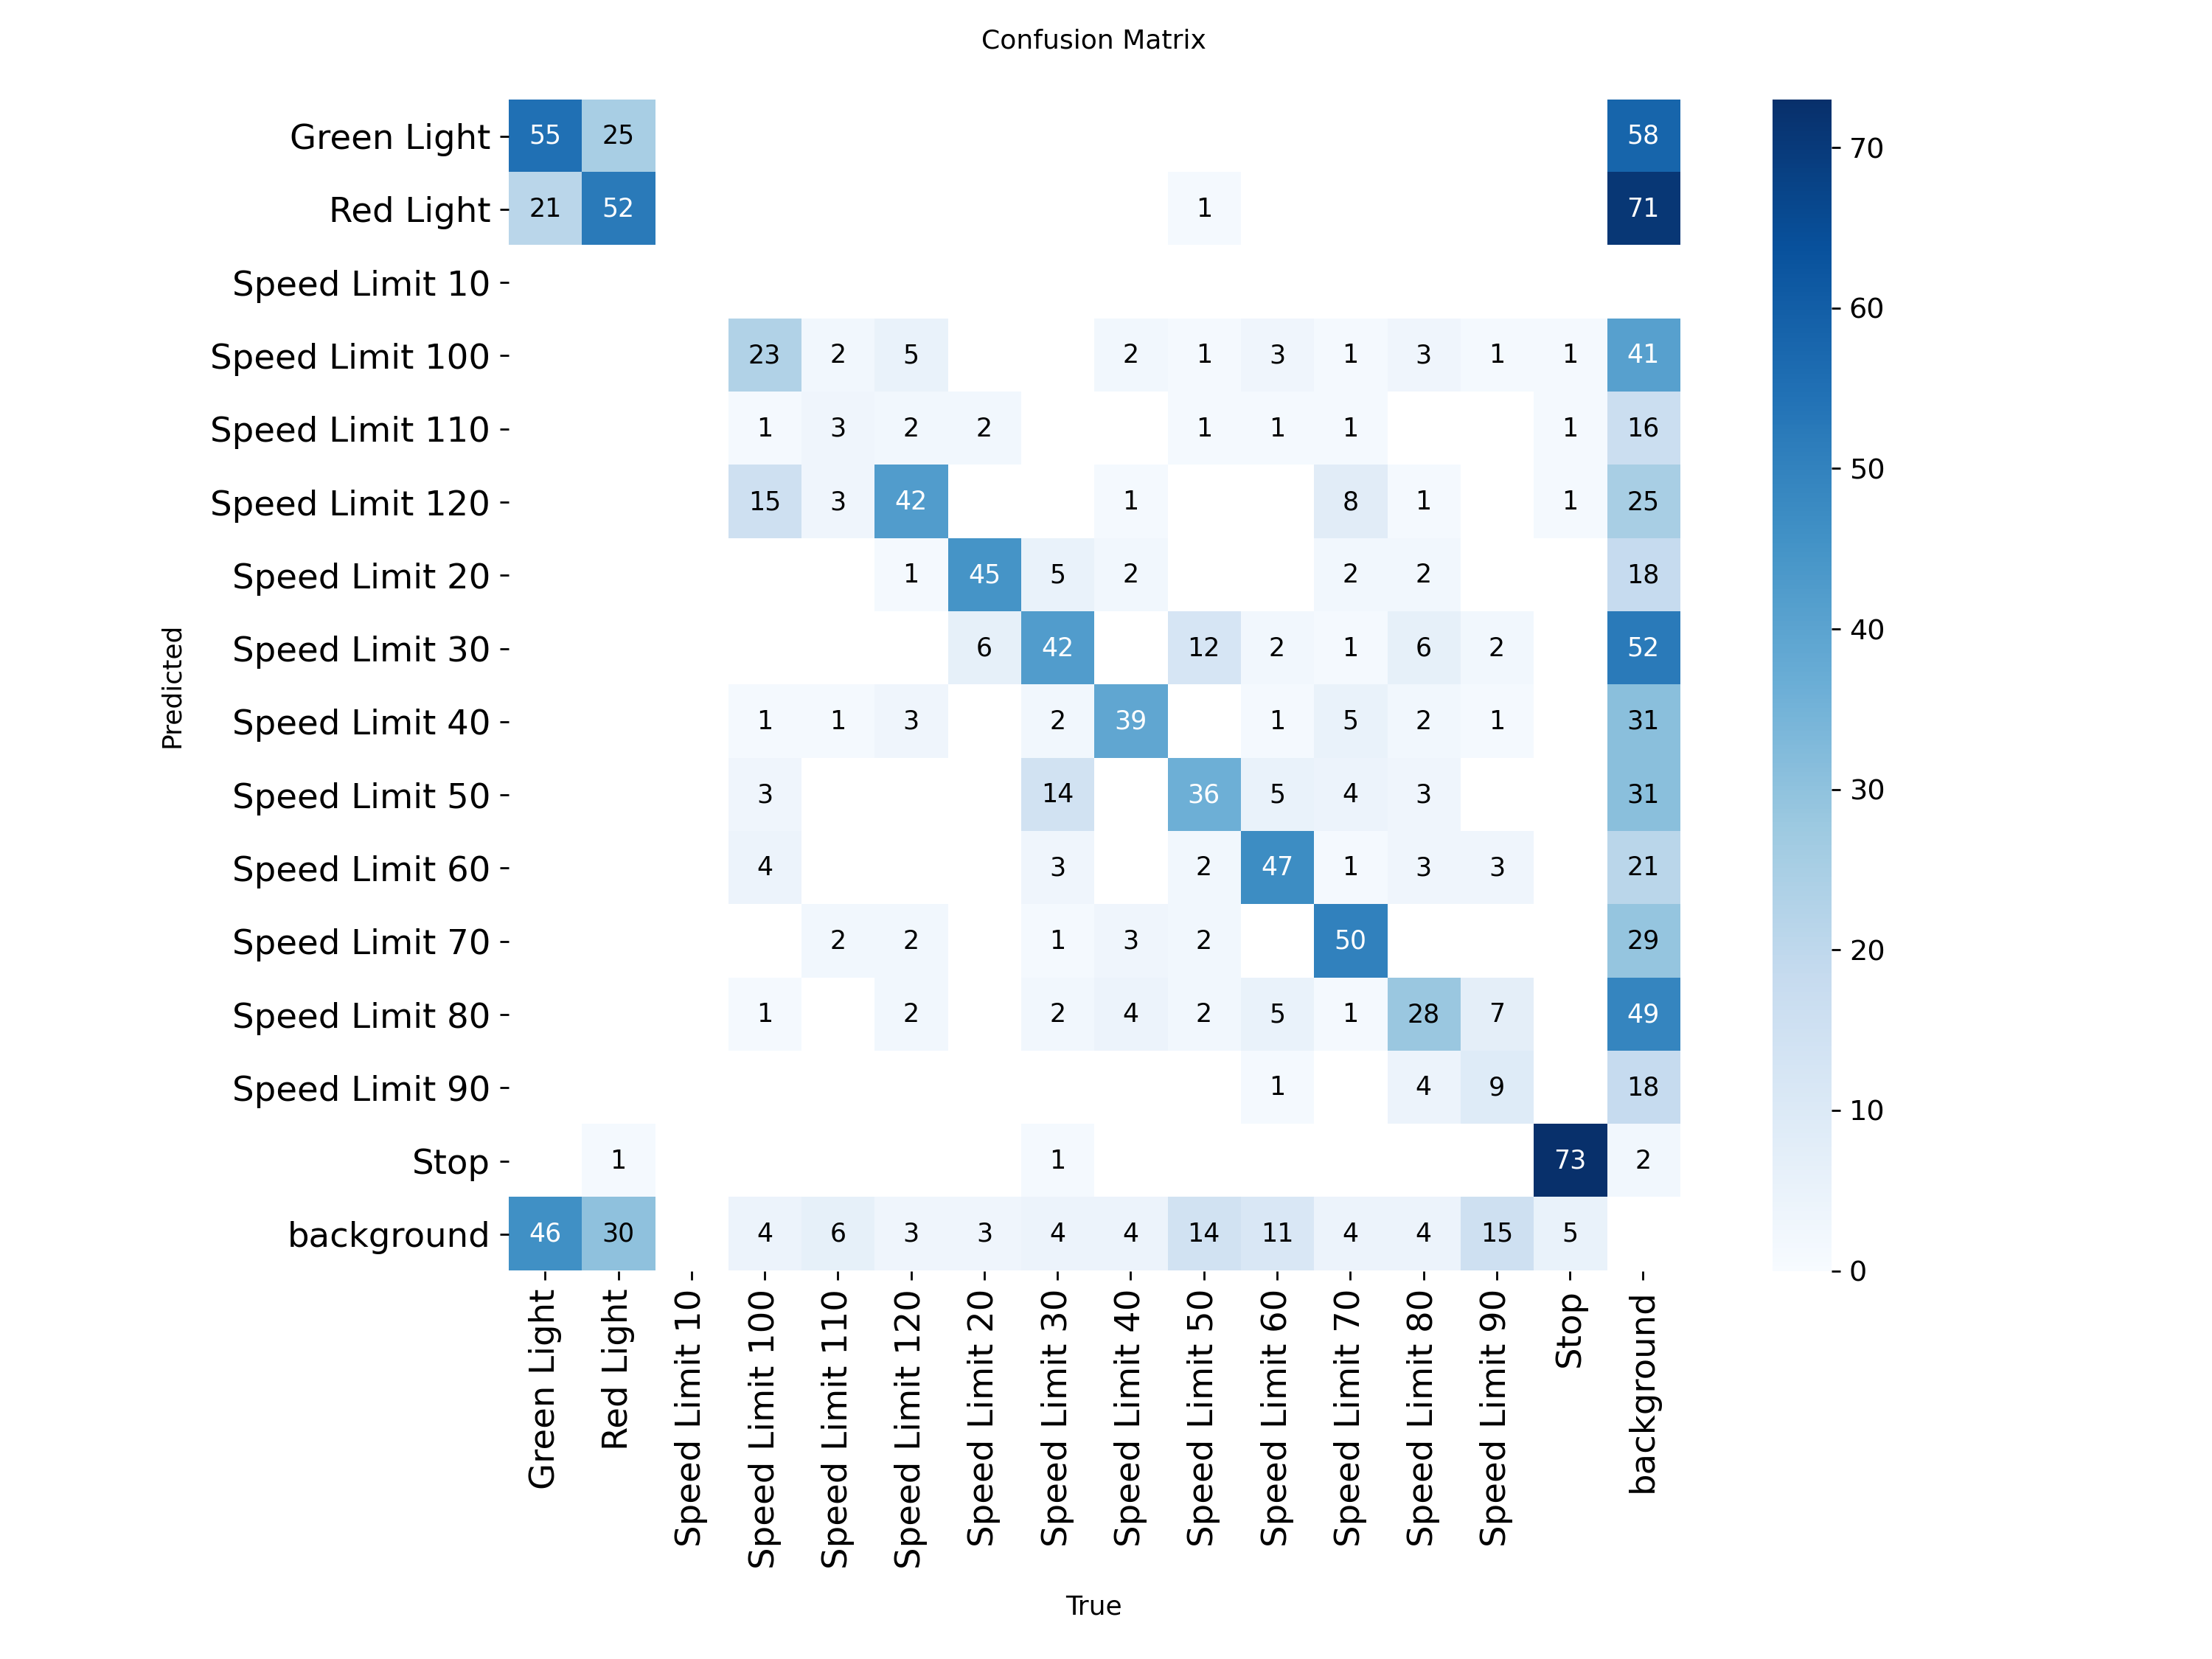

In [17]:
result_data = "/content/RoadSignDetection/runs/detect/train2"
from IPython.display import Image,display
display(Image(filename=f"{result_data}/confusion_matrix.png"))

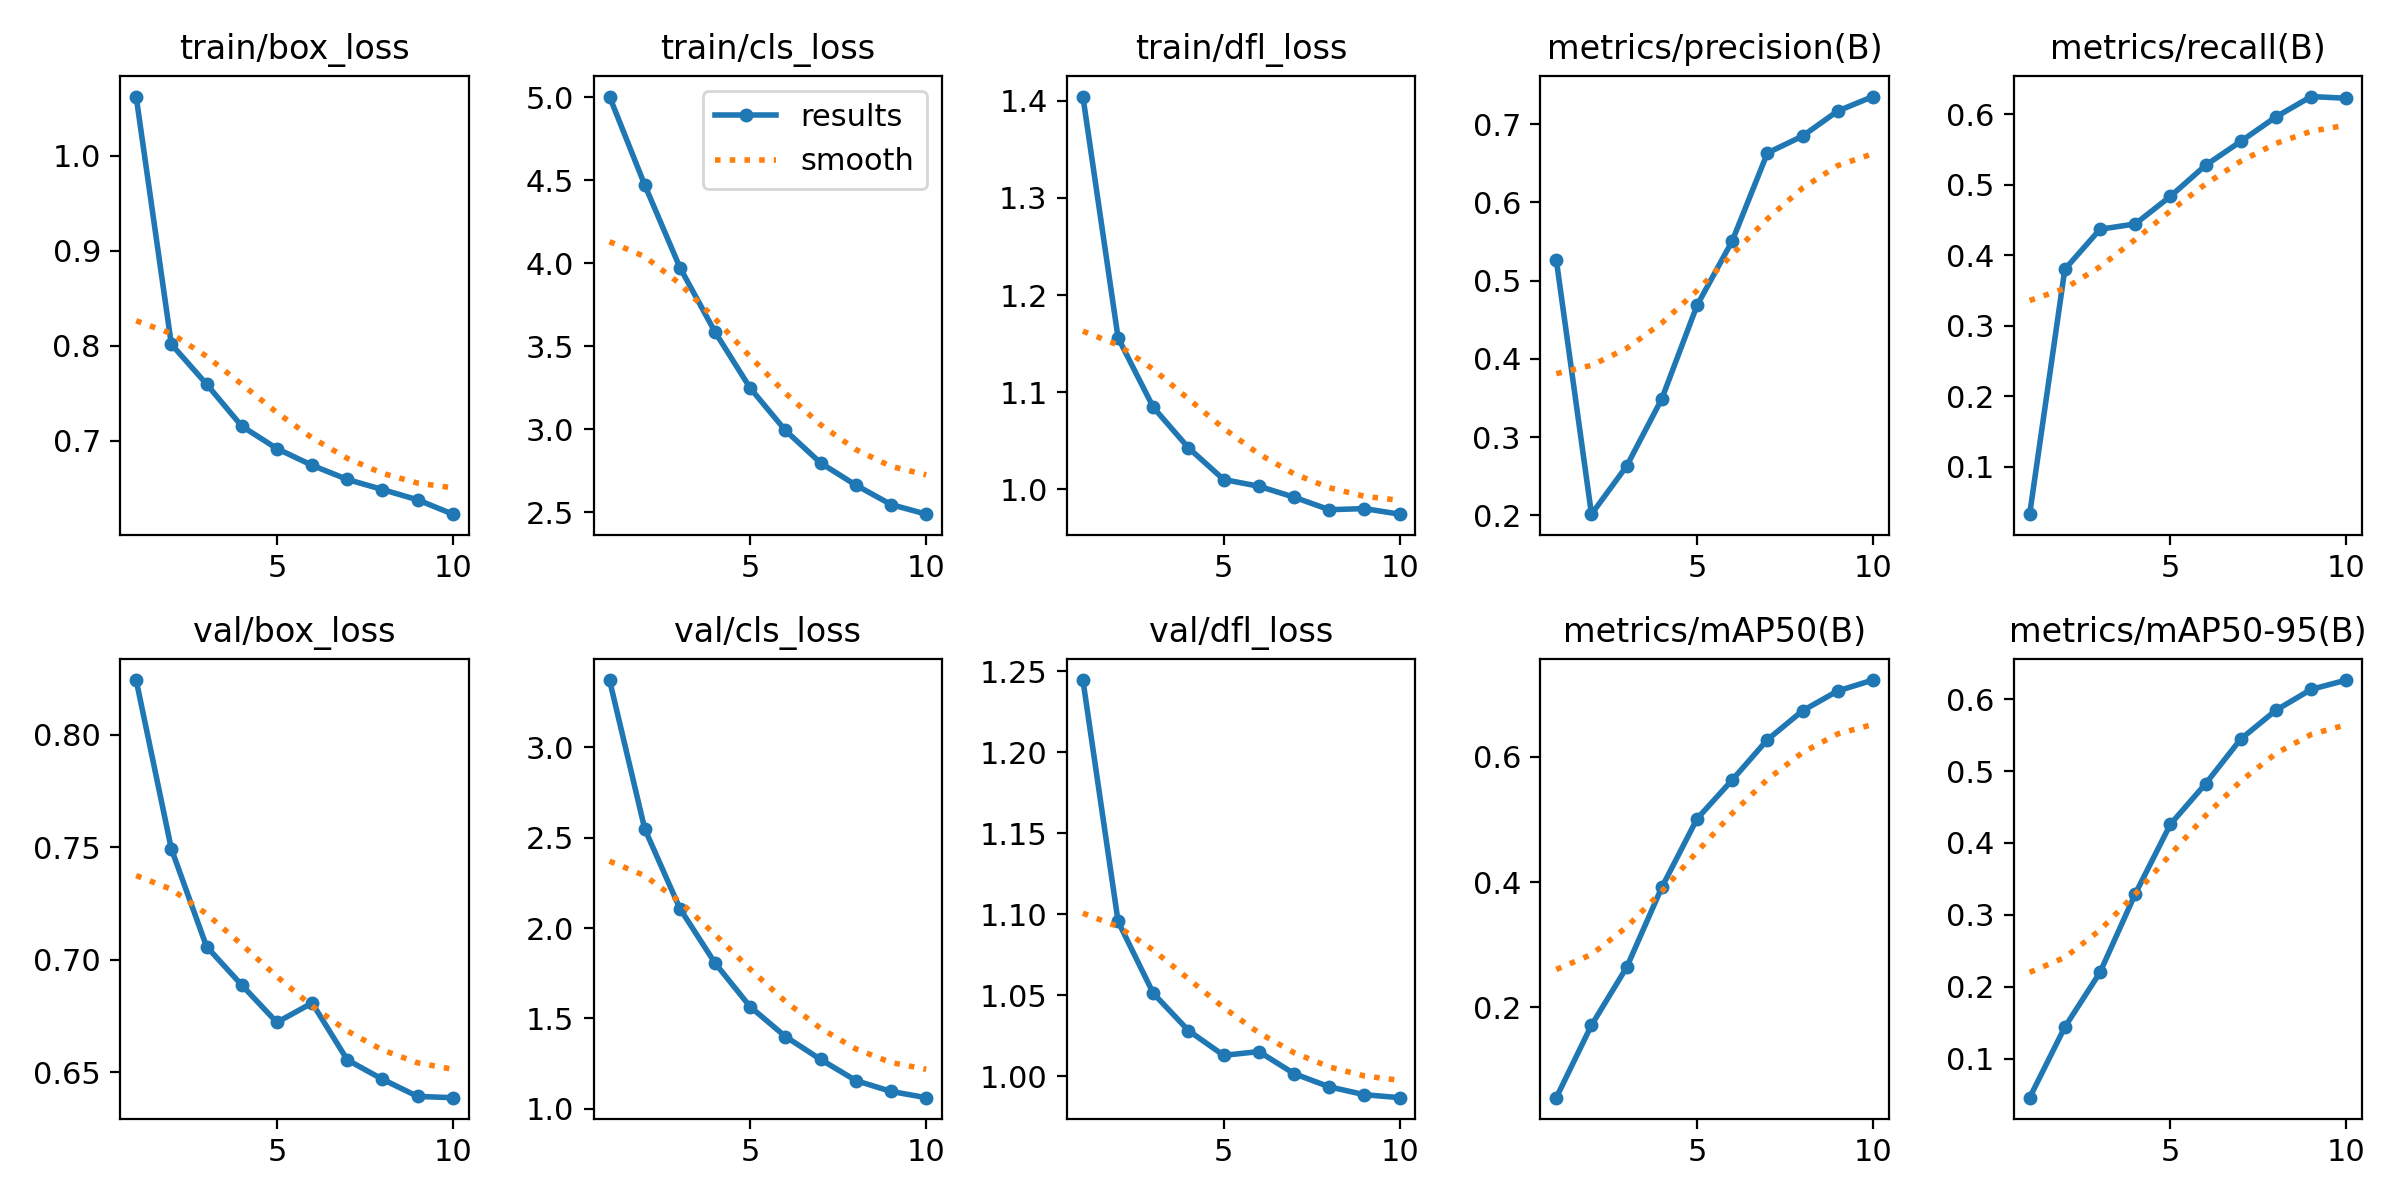

In [19]:
Image(filename=f'{result_data}/results.png')

In [23]:
import pandas as pd
df=pd.read_csv(f'{result_data}/results.csv')
print(df.head(5))

   epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1   88.7862         1.06214         5.00282         1.40423   
1      2  168.2620         0.80167         4.47035         1.15593   
2      3  240.2060         0.75973         3.97312         1.08450   
3      4  310.0280         0.71551         3.58412         1.04281   
4      5  378.9540         0.69188         3.24609         1.01018   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.52669            0.03283           0.05621   
1               0.20143            0.38023           0.17172   
2               0.26290            0.43701           0.26392   
3               0.34905            0.44456           0.39163   
4               0.46837            0.48374           0.50077   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.04582       0.82431       3.37339       1.24456  0.000524   
1              0.14405       0.74931  

**Validata the Model**

**Test your model on any arbitary video containing road signs**

In [24]:
%pwd

'/content/RoadSignDetection'

In [25]:
os.chdir("/content")

In [26]:
%pwd

'/content'

In [42]:
import os
# The dataset is in /content/, not inside RoadSignDetection
os.chdir("/content/Self-Driving-Cars-6")

In [55]:
!mkdir ManualTestingData

mkdir: cannot create directory ‘ManualTestingData’: File exists


In [56]:
os.chdir("/content/ManualTestingData")

In [59]:
!rm -rf /content/ManualTestingData/*


In [61]:
!pip install -q gdown
!gdown 1bKTgRWemlstzU7MLhLs5oQmuYHy30cnl -O /content/ManualTestingData/input1.jpg


Downloading...
From: https://drive.google.com/uc?id=1bKTgRWemlstzU7MLhLs5oQmuYHy30cnl
To: /content/ManualTestingData/input1.jpg
100% 74.2k/74.2k [00:00<00:00, 113MB/s]


In [62]:
!ls -lh /content/ManualTestingData


total 76K
-rw-r--r-- 1 root root 73K Jan 15 15:42 input1.jpg


(np.float64(-0.5), np.float64(735.5), np.float64(980.5), np.float64(-0.5))

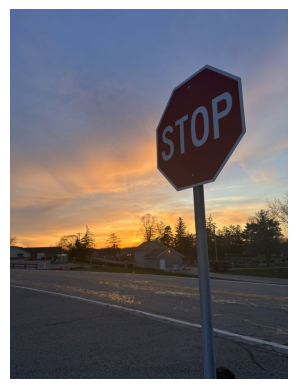

In [63]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("/content/ManualTestingData/input1.jpg")
plt.imshow(img)
plt.axis("off")


In [64]:
from ultralytics import YOLO

model = YOLO("/content/RoadSignDetection/runs/detect/train2/weights/best.pt")

model.predict(
    source="/content/ManualTestingData/input1.jpg",
    conf=0.25,
    save=True
)



image 1/1 /content/ManualTestingData/input1.jpg: 640x480 1 Stop, 98.2ms
Speed: 3.5ms preprocess, 98.2ms inference, 52.2ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /content/ManualTestingData/runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Green Light', 1: 'Red Light', 2: 'Speed Limit 10', 3: 'Speed Limit 100', 4: 'Speed Limit 110', 5: 'Speed Limit 120', 6: 'Speed Limit 20', 7: 'Speed Limit 30', 8: 'Speed Limit 40', 9: 'Speed Limit 50', 10: 'Speed Limit 60', 11: 'Speed Limit 70', 12: 'Speed Limit 80', 13: 'Speed Limit 90', 14: 'Stop'}
 obb: None
 orig_img: array([[[155, 105,  83],
         [155, 105,  83],
         [155, 105,  83],
         ...,
         [155, 113,  94],
         [155, 113,  94],
         [154, 112,  93]],
 
        [[155, 105,  83],
         [155, 105,  83],
         [155, 105,  83],
         ...,
         [155, 113,  94],
         [155, 113,  94],
         [155, 113,  94]],
 
        [[155, 105,  83],
         [155, 105,  83],
         [155, 105,  83],
         ...,
         [155, 113,  94],
         [155, 113,  94],
         [155, 113,  94]],
 
      

In [65]:
!mkdir -p /content/ManualTestingData


In [66]:
!pip install -q gdown


In [67]:
!gdown 1-Iwngi-OtcYcSgvU638n5GkM65kyPIAu -O /content/ManualTestingData/img2.jpg


Downloading...
From: https://drive.google.com/uc?id=1-Iwngi-OtcYcSgvU638n5GkM65kyPIAu
To: /content/ManualTestingData/img2.jpg
100% 21.3k/21.3k [00:00<00:00, 68.7MB/s]


In [68]:
!ls -lh /content/ManualTestingData/img2.jpg


-rw-r--r-- 1 root root 21K Jan 15 15:42 /content/ManualTestingData/img2.jpg


In [69]:
from ultralytics import YOLO

model = YOLO("/content/RoadSignDetection/runs/detect/train2/weights/best.pt")

model.predict(
    source="/content/ManualTestingData/img2.jpg",
    conf=0.25,
    save=True
)



image 1/1 /content/ManualTestingData/img2.jpg: 640x448 1 Green Light, 1 Red Light, 65.2ms
Speed: 2.3ms preprocess, 65.2ms inference, 6.8ms postprocess per image at shape (1, 3, 640, 448)
Results saved to /content/ManualTestingData/runs/detect/predict2


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Green Light', 1: 'Red Light', 2: 'Speed Limit 10', 3: 'Speed Limit 100', 4: 'Speed Limit 110', 5: 'Speed Limit 120', 6: 'Speed Limit 20', 7: 'Speed Limit 30', 8: 'Speed Limit 40', 9: 'Speed Limit 50', 10: 'Speed Limit 60', 11: 'Speed Limit 70', 12: 'Speed Limit 80', 13: 'Speed Limit 90', 14: 'Stop'}
 obb: None
 orig_img: array([[[117, 105, 105],
         [120, 108, 108],
         [128, 115, 117],
         ...,
         [103,  78,  68],
         [101,  79,  68],
         [101,  79,  68]],
 
        [[ 99,  87,  87],
         [103,  91,  91],
         [113, 100, 102],
         ...,
         [102,  77,  67],
         [102,  77,  67],
         [100,  78,  67]],
 
        [[ 85,  73,  73],
         [ 91,  79,  79],
         [103,  90,  92],
         ...,
         [104,  77,  67],
         [101,  76,  66],
         [ 98,  76,  65]],
 
      

(np.float64(-0.5), np.float64(320.5), np.float64(479.5), np.float64(-0.5))

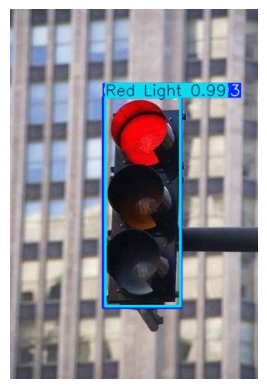

In [71]:
from PIL import Image
import matplotlib.pyplot as plt

out = Image.open("/content/ManualTestingData/runs/detect/predict2/img2.jpg")
plt.imshow(out)
plt.axis("off")

In [ ]:
https://drive.google.com/file/d/1ArUsH-Vb3L4GofvdGQDkAVHIDmbu9ziH/view?usp=sharing

In [74]:
!gdown 1ArUsH-Vb3L4GofvdGQDkAVHIDmbu9ziH -O /content/ManualTestingData/img3.jpg

Downloading...
From: https://drive.google.com/uc?id=1ArUsH-Vb3L4GofvdGQDkAVHIDmbu9ziH
To: /content/ManualTestingData/img3.jpg
100% 66.8k/66.8k [00:00<00:00, 102MB/s]


In [75]:
from ultralytics import YOLO

model = YOLO("/content/RoadSignDetection/runs/detect/train2/weights/best.pt")

model.predict(
    source="/content/ManualTestingData/img3.jpg",
    conf=0.25,
    save=True
)



image 1/1 /content/ManualTestingData/img3.jpg: 416x640 (no detections), 37.7ms
Speed: 2.8ms preprocess, 37.7ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 640)
Results saved to /content/ManualTestingData/runs/detect/predict3


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Green Light', 1: 'Red Light', 2: 'Speed Limit 10', 3: 'Speed Limit 100', 4: 'Speed Limit 110', 5: 'Speed Limit 120', 6: 'Speed Limit 20', 7: 'Speed Limit 30', 8: 'Speed Limit 40', 9: 'Speed Limit 50', 10: 'Speed Limit 60', 11: 'Speed Limit 70', 12: 'Speed Limit 80', 13: 'Speed Limit 90', 14: 'Stop'}
 obb: None
 orig_img: array([[[ 49,  23,   0],
         [104,  72,  36],
         [188, 143,  92],
         ...,
         [168,  89,  38],
         [169,  90,  39],
         [170,  91,  40]],
 
        [[ 86,  57,  30],
         [132, 100,  65],
         [196, 153, 104],
         ...,
         [162,  83,  32],
         [162,  83,  32],
         [162,  83,  32]],
 
        [[ 87,  56,  31],
         [145, 112,  79],
         [157, 116,  71],
         ...,
         [162,  83,  32],
         [161,  82,  31],
         [161,  82,  31]],
 
      

(np.float64(-0.5), np.float64(735.5), np.float64(459.5), np.float64(-0.5))

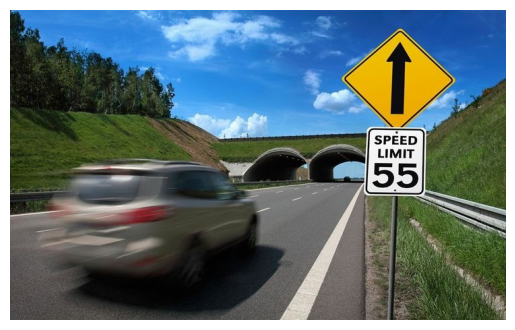

In [78]:
from PIL import Image
import matplotlib.pyplot as plt

out = Image.open("/content/ManualTestingData/runs/detect/predict3/img3.jpg")
plt.imshow(out)
plt.axis("off")

In [79]:
from google.colab import files
files.download('/content/ManualTestingData/runs/detect/predict/input1.jpg')
files.download('/content/ManualTestingData/runs/detect/predict2/img2.jpg')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>